# Лабораторна робота №1 з дисципліни "Вступ до машиного навчання" на тему "Linear Regression"

**Виконав**: Зарицький Кирило Андрійович ДА-01

**Мета**: навчитись реалізовувати лінійну регресію та градієнтний спуск.

## Зміст
1. [Завдання](#task)
2. [Хід Роботи](#work)
    1. [Загальні Налаштування](#general-values)
    2. [Глобальні ф-ії](#general-functions)
    3. [Клас Моделі](#model-class)
    4. [Візуалізація тренувальних даних](#visualisation)
    5. [Тренування](#training)
    6. [Тестування](#testing)
3. [Додаток А](#bA)
    

## Завдання:<a class="anchor" id="task"></a>

1. Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
2. Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
    1. Візуалізувати дані з lab1_train.csv.
    2. Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
    3. Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
    4. Візуалізувати на одному графіку дані з lab1_train.csv, lab1_test.csv та лінію, до якої зійшовся розв’язок.

**!** Використати **класичний (батчевий) градієнтний спуск**.

**!** У лабораторній роботі можна використовувати лише стандартні засоби мови програмування Python, а також бібліотеки Numpy та Matplotlib.

**!** Заборонено використовувати використовувати pandas, sklearn та подібні.

## Хід Роботи<a class="anchor" id="work"></a>

### Примітки
* Для роботи програми мають бути присутьні файли "lab_1_train.csv" та "lab_1_test.csv". Їх місцезнаходження та назву можна змінити в блоці загальних налаштувань.
* У методі LinearRegression.train() один з опціональних параметрів -- printThreshold встановлює к-сть ітерацій що буде виведено. Всі ітерації можна подивитись в Додатку А в кінці документу.

### Загальні налаштування <a class="anchor" id="general-values"></a>

In [34]:
import numpy as np
import csv
import matplotlib.pyplot as pp
from decimal import *

TRAIN_PATH = ""
TRAIN_NAME = "lab_1_train"
print("Train data in:",TRAIN_PATH + TRAIN_NAME + ".csv")

TEST_PATH = ""
TEST_NAME = "lab_1_test"
print(" Test data in:",TEST_PATH + TEST_NAME + ".csv")

Train data in: lab_1_train.csv
 Test data in: lab_1_test.csv


### Глобальні функції <a class="anchor" id="general-functions"></a>

In [35]:
def readCSV(fielPath):
    readData = []
    with open(fielPath) as readFile:
        csvReader = csv.reader(readFile)
        next(csvReader)
        for row in csvReader:
            readData.append({"x":float(row[1]),"y":float(row[2])})
    return readData

### Клас Моделі <a class="anchor" id="model-class"></a>

In [36]:
class LinearRegression:
    class UntrainedEvaluation(Exception):
        def __init__(self):            
            super().__init__("evaluation method was called, but model is untrained!")
            self.errors = []
    
    class TooManyIterations(Exception):
        def __init__(self):            
            super().__init__("training did not succed: to many iterations!")
            self.errors = []

    bias = 0
    weight = 0
    __trained = False

    _MAX_ITERATIONS = 1000000

    def evaluate(self, x):
        '''
        Evaluates prediction by given parameter

        Throws UntrainedEvaluation exception, if model is untrained
        '''
        if(not self.__trained):
            raise self.UntrainedEvaluation
        else:
            return self.bias + self.weight * x

    def loss(self, data):
        '''
        Calculate loss by suplied data (must be in format [{"x":float,"y":float}])

        Throws UntrainedEvaluation exception, if model is untrained
        '''
        out = 0
        for row in data:
            out += (row["y"] - self.evaluate(row["x"])) ** 2
        return out/len(data)

    def train(self, data, 
    tolerance = 0.001, 
    learningRate = 0.01, 
    startBias = 1, 
    startWeight = 1,
    printThreshold = 500
    ):
        '''
        Train model using given dataset (must be in format [{"x":float,"y":float}])

        tolerance -- (dec) exit param. When speed of loss decent is les than this param, method finishes

        learning rate -- (dec) learning rate param. constant of decent optimization algorythm

        startBias & startWeight -- (dec) start constants of linear equation

        printTHreshold -- (dec) amount of iteration that will be printed
        '''
        self.__trained = True

        (self.bias, self.weight) = (startBias, startWeight)
        previousLoss = self.loss(data)

        delta = np.Inf
        log = []
        it = 1
        printOverflowWarning = True

        while tolerance < delta:
            
            diffOfValues = [(self.evaluate(row["x"]) - row["y"]) for row in data]
            self.bias -= learningRate/len(diffOfValues)*np.sum(diffOfValues)

            diffOfValuesByX = [(dif * row["x"]) for (dif, row) in zip(diffOfValues,data)]
            self.weight -= learningRate/len(diffOfValuesByX)*np.sum(diffOfValuesByX)

            loss = self.loss(data)
            delta = previousLoss - loss
            previousLoss = loss

            log.append({"i":it,"bias":float(self.bias),"weight":float(self.weight), "loss":float(loss)})
            
            if(it < printThreshold):
                print(log[-1])
            else:
                if printOverflowWarning:
                    print("""
                    ---------------------------------------------------------- 
                    To many iterations. Go to \"Додаток А\" то see more output 
                    ----------------------------------------------------------""")
                    printOverflowWarning = False



            it += 1
            if it > self._MAX_ITERATIONS:
                raise self.TooManyIterations
        
        return (it - 1, log)

### Візуалізація тренувальних даних <a class="anchor" id="visualisation"></a>

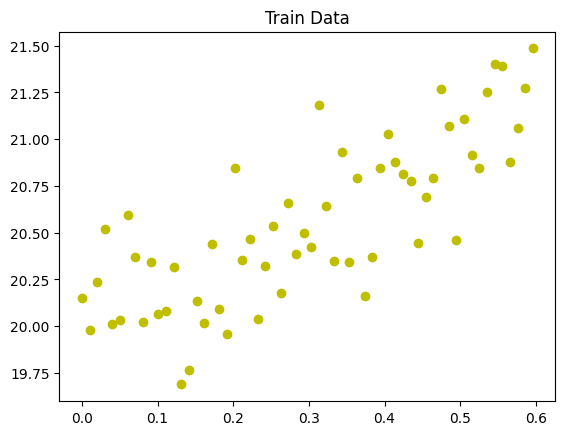

In [37]:
trainData = readCSV(TRAIN_PATH+TRAIN_NAME+".csv")
xColumn = [row["x"] for row in trainData]
yColumn = [row["y"] for row in trainData]
pp.title("Train Data")
pp.plot(xColumn, yColumn, 'yo')
pp.show
print()

### Тренування моделі <a class="anchor" id="training"></a>

{'i': 1, 'bias': 1.1925158339305866, 'weight': 1.057665343557141, 'loss': 362.6923619819969}
{'i': 2, 'bias': 1.3829346784476313, 'weight': 1.114688180680401, 'loss': 354.8332925376141}
{'i': 3, 'bias': 1.5712794179846432, 'weight': 1.1710755270795998, 'loss': 347.14482038800935}
{'i': 4, 'bias': 1.7575726872253987, 'weight': 1.2268343218973314, 'loss': 339.62324221732894}
{'i': 5, 'bias': 1.9418368738295928, 'weight': 1.2819714285445836, 'loss': 332.26493510116086}
{'i': 6, 'bias': 2.1240941211287456, 'weight': 1.3364936355272377, 'loss': 325.06635476140247}
{'i': 7, 'bias': 2.3043663307926856, 'weight': 1.3904076572635482, 'loss': 318.0240338590078}
{'i': 8, 'bias': 2.482675165466934, 'weight': 1.443720134892701, 'loss': 311.134580323798}
{'i': 9, 'bias': 2.6590420513813022, 'weight': 1.4964376370745471, 'loss': 304.39467572052706}
{'i': 10, 'bias': 2.833488180930025, 'weight': 1.5485666607806092, 'loss': 297.801073650418}
{'i': 11, 'bias': 3.0060345152237327, 'weight': 1.60011363207

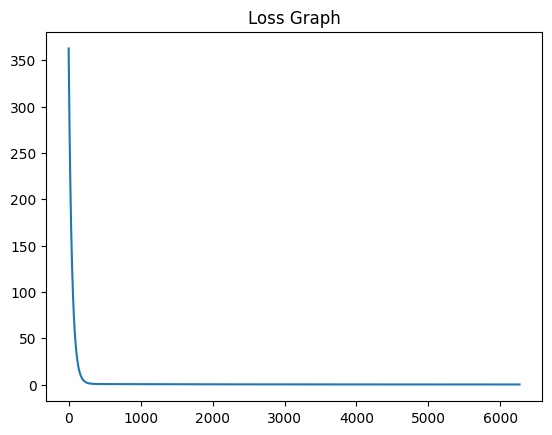

In [38]:
model = LinearRegression()
a, log = model.train(trainData, tolerance=0.00001, printThreshold=100)
lossColumn = [row["loss"] for row in log]
pp.title("Loss Graph")
pp.plot(lossColumn)
print("Result:")
print("bias:",model.bias,"\nweight:", model.weight)
print("Total iterations:",a)

### Тестування моделі <a class="anchor" id="testing"></a>

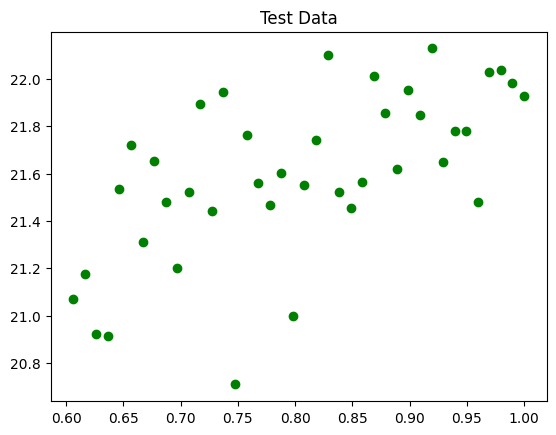

In [39]:
testData = readCSV(TEST_PATH+TEST_NAME+".csv")
xColumnTest = [row["x"] for row in testData]
yColumnTest = [row["y"] for row in testData]
pp.title("Test Data")
pp.plot(xColumnTest, yColumnTest, 'go')
pp.show
print()

Model Loss on test data: 0.1919686341641142


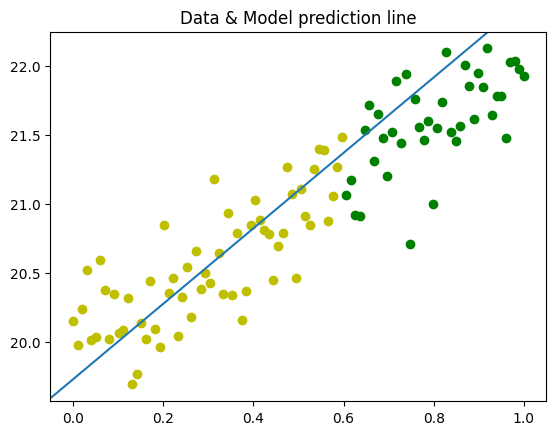

In [40]:
pp.title("Data & Model prediction line")
pp.plot(xColumn, yColumn, 'yo',
         xColumnTest, yColumnTest, 'go')
pp.axline((0,model.bias),slope=model.weight)
pp.show

print("Model Loss on test data:",model.loss(testData))

## Дотаток А: повне виведення ітерацій <a class="anchor" id="bA"></a>

In [41]:
from tabulate import tabulate
print(tabulate([x.values() for x in log],headers=log[0].keys()))

   i      bias    weight         loss
----  --------  --------  -----------
   1   1.19252   1.05767  362.692
   2   1.38293   1.11469  354.833
   3   1.57128   1.17108  347.145
   4   1.75757   1.22683  339.623
   5   1.94184   1.28197  332.265
   6   2.12409   1.33649  325.066
   7   2.30437   1.39041  318.024
   8   2.48268   1.44372  311.135
   9   2.65904   1.49644  304.395
  10   2.83349   1.54857  297.801
  11   3.00603   1.60011  291.351
  12   3.1767    1.65108  285.04
  13   3.34551   1.70149  278.867
  14   3.51248   1.75133  272.827
  15   3.67763   1.80061  266.919
  16   3.84099   1.84934  261.139
  17   4.00256   1.89752  255.484
  18   4.16238   1.94517  249.952
  19   4.32045   1.99228  244.54
  20   4.47681   2.03887  239.246
  21   4.63146   2.08494  234.067
  22   4.78443   2.13048  229
  23   4.93573   2.17552  224.043
  24   5.08539   2.22006  219.193
  25   5.23341   2.26409  214.449
  26   5.37983   2.30763  209.808
  27   5.52465   2.35069  205.267
  28   5.667